# **ANLY 535 90 - Laboratory #2 Tensorflow and CNN**


Simeng Sun, Saisanthosh Mamidala, Ryan Murtha, Shuyu Sui, Lujing Xi

**Step1. GPU**

In [ ]:
from tensorflow.python.client import device_lib
print("Show System RAM Memory:\n\n")
!cat /proc/meminfo |egrep "MemTotal*"
print("\n\nShow Devices:\n\n"+str(device_lib.list_local_devices()))

Show System RAM Memory:


MemTotal:       13333568 kB


Show Devices:

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8468722545687898007
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 15703311680
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3940192532324212301
physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
]


In [ ]:
import tensorflow as tf 
tf.__version__

'2.4.1'

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import time
start =time.time()
%run /content/gdrive/MyDrive/Machine_Learning/mnist_cnn.py
end =time.time()
print(end -start)

11493376/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/12
375/375 [==============================] - 33s 7ms/step - loss: 0.5397 - accuracy: 0.8271 - val_loss: 0.0621 - val_accuracy: 0.9827
Epoch 2/12
375/375 [==============================] - 2s 6ms/step - loss: 0.0999 - accuracy: 0.9690 - val_loss: 0.0492 - val_accuracy: 0.9852
Epoch 3/12
375/375 [==============================] - 2s 6ms/step - loss: 0.0749 - accuracy: 0.9774 - val_loss: 0.0436 - val_accuracy: 0.9875
Epoch 4/12
375/375 [==============================] - 2s 6ms/step - loss: 0.0520 - accuracy: 0.9825 - val_loss: 0.0434 - val_accuracy: 0.9883
Epoch 5/12
375/375 [==============================] - 2s 6ms/step - loss: 0.0474 - accuracy: 0.9847 - val_loss: 0.0412 - val_accuracy: 0.9882
Epoch 6/12
375/375 [==============================] - 2s 6ms/step - loss: 0.0404 - accuracy: 0.9869 - val_loss: 0.0391 - val_accuracy: 0.9887
Epoch 7/1

Q1-A Keras code is provided for running hand written recognition on both GPU and CPU. Run the code on colab and your own machine and compare the results.

ANSWER: It only took 58.85 seconds to run the entire code on colab whereas the jupyter notebook on my computer spent 6min 36s completing the code.

**Step2. Implement handwritten recognitionin Tensorflow using CNN**

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K

In [ ]:
batch_size = 128
num_classes = 10
epochs = 12
# input image dimensions
img_rows, img_cols = 28, 28
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


Q2-Explain the way that this model is designed. Talk about all the layers and their functionality.

---
ANSWER: The model is a convolutional neural network model which consists of multiple layers including input layer, convolutional layer, ReLU layer, pooling layer and fully-connected layer. The first two layers of this model are convolutional layers. In the convolutinal layers, we define the number of filters to apply as well as the activation method which in the case is "ReLU". In the first convolutional layer, we also need to define the input shape. And in the second convolutional layer, we apply 64 filters with an activation method of ReLU. The third layer of the model is MaxPooling layer which helps downsample the output. And then we have a flatten layer (can also be referred as fully-connected layer) and this layer is the end of feature extraction and the beginning of the neural network. After that, we have another hidden layer for the neural network. Between the MaxPooling layer and the flatten layer, we also have a dropout layer. Another dropout layer is applied between the last hidden layer and the output layer. In the alst output layer, we apply an activation method of "softmax".


In [ ]:
# evaluate the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

hist = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.2)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/12
375/375 [==============================] - 3s 6ms/step - loss: 0.0219 - accuracy: 0.9930 - val_loss: 0.0385 - val_accuracy: 0.9913
Epoch 2/12
375/375 [==============================] - 2s 6ms/step - loss: 0.0184 - accuracy: 0.9940 - val_loss: 0.0388 - val_accuracy: 0.9909
Epoch 3/12
375/375 [==============================] - 2s 6ms/step - loss: 0.0175 - accuracy: 0.9945 - val_loss: 0.0371 - val_accuracy: 0.9907
Epoch 4/12
375/375 [==============================] - 2s 6ms/step - loss: 0.0159 - accuracy: 0.9948 - val_loss: 0.0403 - val_accuracy: 0.9906
Epoch 5/12
375/375 [==============================] - 2s 6ms/step - loss: 0.0147 - accuracy: 0.9948 - val_loss: 0.0410 - val_accuracy: 0.9911
Epoch 6/12
375/375 [==============================] - 2s 6ms/step - loss: 0.0153 - accuracy: 0.9946 - val_loss: 0.0456 - val_accuracy: 0.9902
Epoch 7/12
375/375 [==============================] - 2s 6ms/step - loss: 0.0128 - accuracy: 0.9951 - val_loss: 0.0447 - val_accuracy: 0.9913
Epoch 

Q3-Design the learning curve and talk about what you see.

ANSWER: As we see from the result, we have over 99% of accuracy which is great number but seems to be too good for a model. Therefore, we wanted to draw a learning curve and see the trend for both the training data and the test data. It appears that the trend of the test dataset is different from the trend of the training dataset when running the epochs. This indicates that there is still room to improve our model. 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

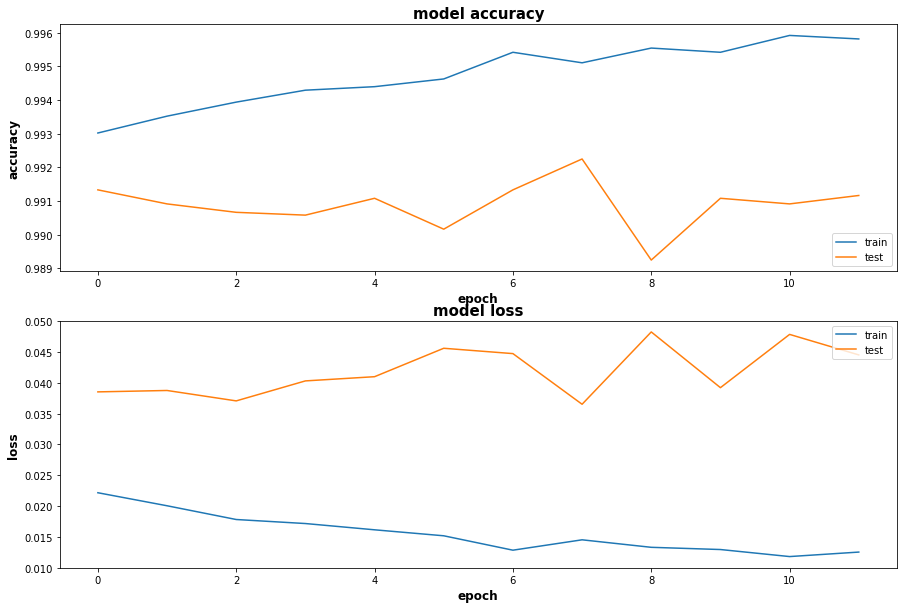

In [ ]:
fig = plt.figure(figsize=(15, 10))
plt.subplot(2,1,1)

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy', fontsize=15, fontweight='bold')
plt.ylabel('accuracy', fontsize=12, fontweight='bold')
plt.xlabel('epoch', fontsize=12, fontweight='bold')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss', fontsize=15, fontweight='bold')
plt.ylabel('loss', fontsize=12, fontweight='bold')
plt.xlabel('epoch', fontsize=12, fontweight='bold')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

**Step3. Text mining using CNN**

In [ ]:
df=pd.read_csv('/content/gdrive/MyDrive/Machine_Learning/amazon_cells_labelled.txt',names=['sentence','label'],sep='\t')

*3.1 Pre-processing*

In [ ]:
print(df.iloc[0])

sentence    So there is no way for me to plug it in here i...
label                                                       0
Name: 0, dtype: object


In [ ]:
print(df.head())

                                            sentence  label
0  So there is no way for me to plug it in here i...      0
1                        Good case, Excellent value.      1
2                             Great for the jawbone.      1
3  Tied to charger for conversations lasting more...      0
4                                  The mic is great.      1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [ ]:
sentences =df['sentence'].values
y =df['label'].values
sentences_train,sentences_test,y_train,y_test =train_test_split(sentences,y,test_size=0.25,random_state=1000)

In [ ]:
vectorizer =CountVectorizer()
vectorizer.fit(sentences_train)
X_train =vectorizer.transform(sentences_train)
X_test  =vectorizer.transform(sentences_test)
X_train

<750x1546 sparse matrix of type '<class 'numpy.int64'>'
	with 6817 stored elements in Compressed Sparse Row format>

In [ ]:
classifier =LogisticRegression()
classifier.fit(X_train,y_train)
score =classifier.score(X_test,y_test)
print("Accuracy:",score)

Accuracy: 0.796


In [ ]:
X_train =vectorizer.transform(sentences_train).toarray()
X_test =vectorizer.transform(sentences_test).toarray()

In [ ]:
input_dim =X_train.shape[1]# Number of features

model =Sequential()
model.add(layers.Dense(10,input_dim=input_dim,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

hist =model.fit(X_train,y_train,epochs=100,validation_split=0.2 ,batch_size=10)
loss, accuracy =model.evaluate(X_test,y_test,verbose=False)

print("TestAccuracy: ",accuracy*100)

Epoch 1/100
60/60 [==============================] - 1s 4ms/step - loss: 0.6944 - accuracy: 0.4735 - val_loss: 0.6786 - val_accuracy: 0.6133
Epoch 2/100
60/60 [==============================] - 0s 2ms/step - loss: 0.6459 - accuracy: 0.7613 - val_loss: 0.6452 - val_accuracy: 0.7400
Epoch 3/100
60/60 [==============================] - 0s 2ms/step - loss: 0.5770 - accuracy: 0.8775 - val_loss: 0.5964 - val_accuracy: 0.8133
Epoch 4/100
60/60 [==============================] - 0s 2ms/step - loss: 0.4755 - accuracy: 0.9235 - val_loss: 0.5482 - val_accuracy: 0.8333
Epoch 5/100
60/60 [==============================] - 0s 2ms/step - loss: 0.3885 - accuracy: 0.9572 - val_loss: 0.5098 - val_accuracy: 0.7867
Epoch 6/100
60/60 [==============================] - 0s 2ms/step - loss: 0.2933 - accuracy: 0.9857 - val_loss: 0.4720 - val_accuracy: 0.8200
Epoch 7/100
60/60 [==============================] - 0s 2ms/step - loss: 0.2404 - accuracy: 0.9880 - val_loss: 0.4517 - val_accuracy: 0.8200
Epoch 8/100
6

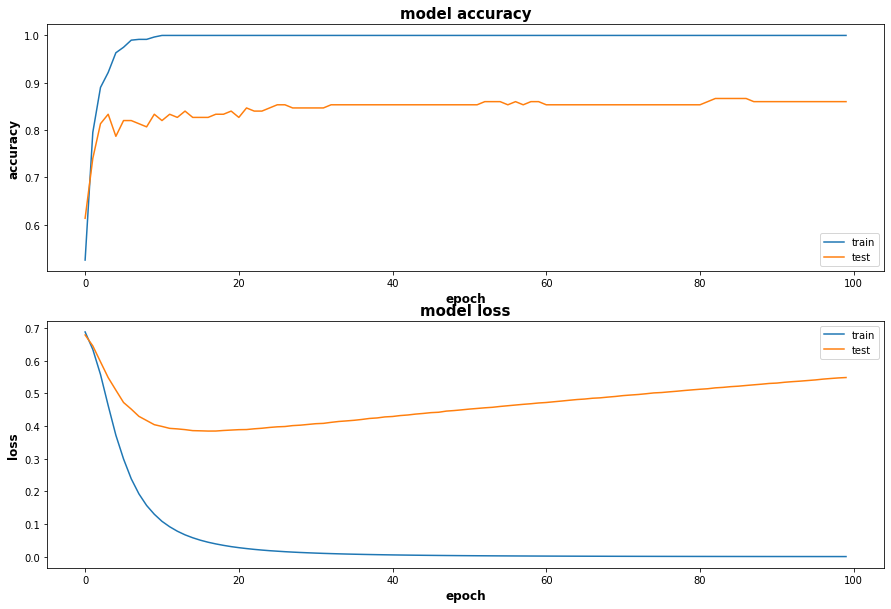

In [ ]:
fig = plt.figure(figsize=(15, 10))
plt.subplot(2,1,1)

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy', fontsize=15, fontweight='bold')
plt.ylabel('accuracy', fontsize=12, fontweight='bold')
plt.xlabel('epoch', fontsize=12, fontweight='bold')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss', fontsize=15, fontweight='bold')
plt.ylabel('loss', fontsize=12, fontweight='bold')
plt.xlabel('epoch', fontsize=12, fontweight='bold')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

Q4-Explain these graphs. If you see any issue, suggest a solution to resolve it.Make the model by creating  3  hidden  layers  (first  one  200  nodes,  second  one  100  nodes  and  last  one  50  nodes  and after each step, add dropout of 0.2 and report the accuracy. 

ANSWER: The graphs indicate potential overfitting as the accuracy of the test dataset is significant lower than the training dataset. In addition, the model stopped improving at early stage (within about 10 epochs). We can consider adding dropout layers in the model. On the other hand, the loss function stopped improving at early stage as well which indicates that there might be a lack of complexity of the model. To resolve it, we can consider adding more hidden layers to the model.
Also, it is worth noting that the logistic regression model has an accuracy of 79.6% and it is actually slightly higher than the accuracy of the DNN model which is 78%. With this being said, it is true that sometimes we don't need fancy models or algorithms to have a fair result.

In [ ]:
# Q4 Continued 

model2 =Sequential()
model2.add(layers.Dense(10,input_dim=input_dim,activation='relu'))
model2.add(layers.Dense(200))
model2.add(layers.Dropout(0.2))
model2.add(layers.Dense(100))
model2.add(layers.Dropout(0.2))
model2.add(layers.Dense(50))
model2.add(layers.Dropout(0.2))
model2.add(layers.Dense(1,activation='sigmoid'))

model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

hist2 =model2.fit(X_train,y_train,epochs=100,validation_split=0.2 ,batch_size=10)
loss, accuracy =model2.evaluate(X_test,y_test,verbose=False)

print("TestAccuracy: ",accuracy*100)

Epoch 1/100
60/60 [==============================] - 1s 5ms/step - loss: 0.6914 - accuracy: 0.5156 - val_loss: 0.6429 - val_accuracy: 0.6867
Epoch 2/100
60/60 [==============================] - 0s 3ms/step - loss: 0.5077 - accuracy: 0.7831 - val_loss: 0.5211 - val_accuracy: 0.7600
Epoch 3/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1595 - accuracy: 0.9379 - val_loss: 0.5970 - val_accuracy: 0.8200
Epoch 4/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0261 - accuracy: 0.9937 - val_loss: 0.7239 - val_accuracy: 0.8200
Epoch 5/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0134 - accuracy: 0.9931 - val_loss: 0.7863 - val_accuracy: 0.8333
Epoch 6/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.9468 - val_accuracy: 0.8400
Epoch 7/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.9517 - val_accuracy: 0.8467
Epoch 8/100
6

**Q4 Continued...**

We have an accuracy of 74.8% after adding more layers and drpouts. We don't see major improvement of the model as expected.


*3.2 Embedded word*

In [ ]:
tokenizer =Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)
X_train =tokenizer.texts_to_sequences(sentences_train)
X_test =tokenizer.texts_to_sequences(sentences_test)

vocab_size =len(tokenizer.word_index)+1# Adding 1 because of reserved 0 index

print(sentences_train[3])
print(X_train[3])

This is the phone to get for 2005.... I just bought my S710a and all I can say is WOW!
[7, 5, 1, 9, 8, 92, 11, 676, 2, 59, 101, 10, 677, 3, 32, 2, 71, 225, 5, 449]


In [ ]:
for word in['the','all','happy']:
  print('{}: {}'.format(word,tokenizer.word_index[word]))

the: 1
all: 32
happy: 86


In [ ]:
maxlen =100
# Pad variables with zeros 
X_train =pad_sequences(X_train,padding='post',maxlen=maxlen)
X_test =pad_sequences(X_test,padding='post',maxlen=maxlen)
print(X_train[0,:])

[  7  24   5  16   4 137 148   6 223 315   2  71 224   8   1 673 111 444
  18 316  11 445   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


*3.3 Model training*

In [ ]:
embedding_dim =50
model3 = Sequential()
model3.add(layers.Embedding(input_dim=vocab_size,
                            output_dim=embedding_dim,
                            input_length=maxlen))
model3.add(layers.GlobalMaxPool1D())
model3.add(layers.Dense(10,activation='relu'))
model3.add(layers.Dense(1,activation='sigmoid'))

model3.compile(optimizer='adam',loss='binary_crossentropy',
              metrics=['accuracy'])
model3.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 50)           78700     
_________________________________________________________________
global_max_pooling1d (Global (None, 50)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 11        
Total params: 79,221
Trainable params: 79,221
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist3 =model3.fit(X_train,y_train,
                  epochs=50,
                  validation_split=0.2,
                  batch_size=10)

loss,accuracy =model3.evaluate(X_test,y_test,verbose=False)

print("Accuracy: ",accuracy)

Epoch 1/50
60/60 [==============================] - 1s 6ms/step - loss: 0.6901 - accuracy: 0.5509 - val_loss: 0.6774 - val_accuracy: 0.6600
Epoch 2/50
60/60 [==============================] - 0s 4ms/step - loss: 0.6559 - accuracy: 0.7438 - val_loss: 0.6380 - val_accuracy: 0.7867
Epoch 3/50
60/60 [==============================] - 0s 4ms/step - loss: 0.5743 - accuracy: 0.8750 - val_loss: 0.5589 - val_accuracy: 0.8000
Epoch 4/50
60/60 [==============================] - 0s 4ms/step - loss: 0.4158 - accuracy: 0.9639 - val_loss: 0.4734 - val_accuracy: 0.8200
Epoch 5/50
60/60 [==============================] - 0s 4ms/step - loss: 0.2580 - accuracy: 0.9766 - val_loss: 0.4232 - val_accuracy: 0.8200
Epoch 6/50
60/60 [==============================] - 0s 4ms/step - loss: 0.1611 - accuracy: 0.9814 - val_loss: 0.3985 - val_accuracy: 0.8333
Epoch 7/50
60/60 [==============================] - 0s 4ms/step - loss: 0.1021 - accuracy: 0.9881 - val_loss: 0.3824 - val_accuracy: 0.8467
Epoch 8/50
60/60 [==

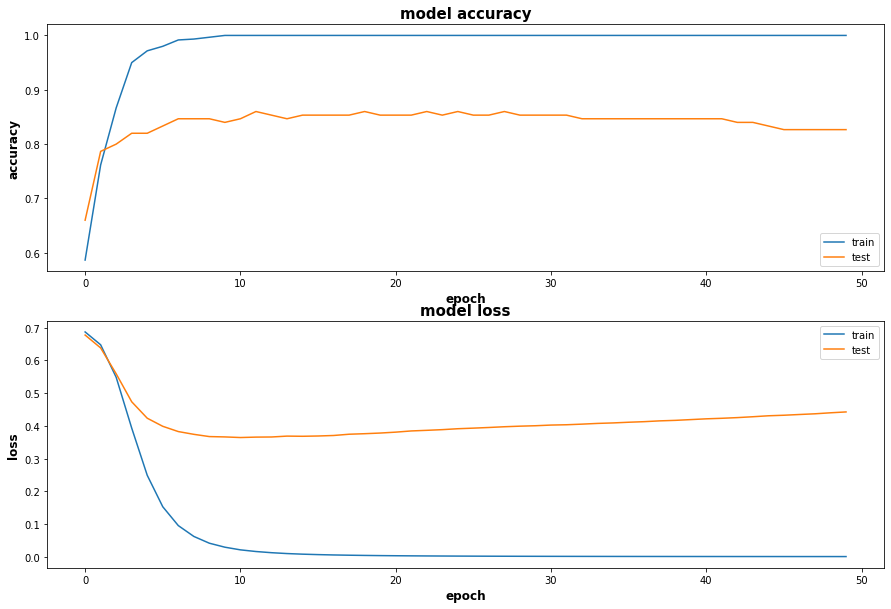

In [ ]:
fig = plt.figure(figsize=(15, 10))
plt.subplot(2,1,1)

plt.plot(hist3.history['accuracy'])
plt.plot(hist3.history['val_accuracy'])
plt.title('model accuracy', fontsize=15, fontweight='bold')
plt.ylabel('accuracy', fontsize=12, fontweight='bold')
plt.xlabel('epoch', fontsize=12, fontweight='bold')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(hist3.history['loss'])
plt.plot(hist3.history['val_loss'])
plt.title('model loss', fontsize=15, fontweight='bold')
plt.ylabel('loss', fontsize=12, fontweight='bold')
plt.xlabel('epoch', fontsize=12, fontweight='bold')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

Q5-How do you interpret these results?

ANSWER: Similar with the DNN model, we see potential overfitting of the CNN model although CNN shows higher accuracy of 80% than the DNN model. The DNN model stopped improving at very early stage and the test dataset showed lower accuarcy than training dataset. 

Q6-What is your recommendation to improve the accuracy?Implement your idea.

ANSWER: My recommendation for this case is to add in more layers such as dropout layers.

In [ ]:
model4 = Sequential()
model4.add(layers.Embedding(input_dim=vocab_size,
                            output_dim=embedding_dim,
                            input_length=maxlen))
model4.add(layers.GlobalMaxPool1D())
model4.add(Dropout(0.25))
model4.add(layers.Dense(15,activation='relu'))
model4.add(Dropout(0.25))
model4.add(layers.Dense(10,activation='relu'))
model4.add(layers.Dense(1,activation='sigmoid'))

model4.compile(optimizer='adam',loss='binary_crossentropy',
              metrics=['accuracy'])

hist4 =model4.fit(X_train,y_train,
                  epochs=50,
                  validation_split=0.2,
                  batch_size=10)

loss,accuracy =model4.evaluate(X_test,y_test,verbose=False)

print("Accuracy: ",accuracy)

Epoch 1/50
60/60 [==============================] - 1s 6ms/step - loss: 0.6920 - accuracy: 0.5176 - val_loss: 0.6883 - val_accuracy: 0.5467
Epoch 2/50
60/60 [==============================] - 0s 4ms/step - loss: 0.6872 - accuracy: 0.5737 - val_loss: 0.6768 - val_accuracy: 0.6400
Epoch 3/50
60/60 [==============================] - 0s 4ms/step - loss: 0.6635 - accuracy: 0.6837 - val_loss: 0.6521 - val_accuracy: 0.7000
Epoch 4/50
60/60 [==============================] - 0s 4ms/step - loss: 0.6244 - accuracy: 0.7359 - val_loss: 0.6091 - val_accuracy: 0.7600
Epoch 5/50
60/60 [==============================] - 0s 4ms/step - loss: 0.5466 - accuracy: 0.8805 - val_loss: 0.5373 - val_accuracy: 0.7800
Epoch 6/50
60/60 [==============================] - 0s 4ms/step - loss: 0.4346 - accuracy: 0.8894 - val_loss: 0.4614 - val_accuracy: 0.8067
Epoch 7/50
60/60 [==============================] - 0s 4ms/step - loss: 0.2666 - accuracy: 0.9579 - val_loss: 0.4118 - val_accuracy: 0.8267
Epoch 8/50
60/60 [==

**Q6 Continued...**

It indicated that after I implemented my idea of adding more layers to the model, the accuracy went up from 80% to 82%. However, we still see similar trend when plotting the learning curves. Therefore, we shall keep on working on the model with different parameters and see how the model can be furthur improved. 

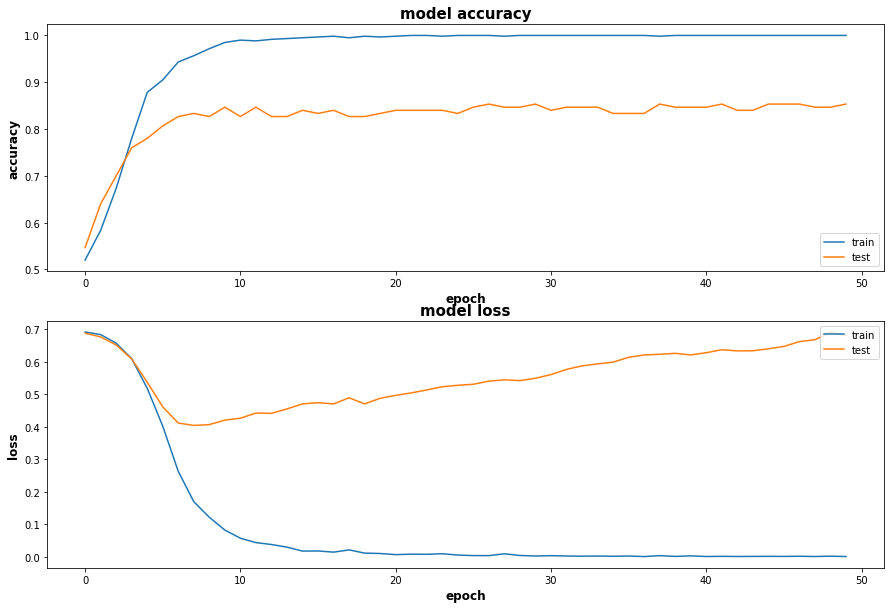

In [ ]:
fig = plt.figure(figsize=(15, 10))
plt.subplot(2,1,1)

plt.plot(hist4.history['accuracy'])
plt.plot(hist4.history['val_accuracy'])
plt.title('model accuracy', fontsize=15, fontweight='bold')
plt.ylabel('accuracy', fontsize=12, fontweight='bold')
plt.xlabel('epoch', fontsize=12, fontweight='bold')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(hist4.history['loss'])
plt.plot(hist4.history['val_loss'])
plt.title('model loss', fontsize=15, fontweight='bold')
plt.ylabel('loss', fontsize=12, fontweight='bold')
plt.xlabel('epoch', fontsize=12, fontweight='bold')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
%shell jupyter nbconvert --to html '//content/gdrive/MyDrive/Colab Notebooks/ANLY 535 90 Lab 2 - Simeng Sun.ipynb'

[NbConvertApp] Converting notebook //content/gdrive/MyDrive/Colab Notebooks/ANLY 535 90 Lab 2 - Simeng Sun.ipynb to html
[NbConvertApp] Writing 616202 bytes to //content/gdrive/MyDrive/Colab Notebooks/ANLY 535 90 Lab 2 - Simeng Sun.html
